| **Inicio** | **atrás 18** | **Siguiente 20** |
|----------- |-------------- |---------------|
| [🏠](../../README.md) | [⏪](./18.Clustering.ipynb)| [⏩](./20.K-Vecinos.ipynb)|

# **19. Pese a Datos o Clases Desbalanceadas crea Clasificadores de Machine Learning asignando Pesos**

## **Introducción al problema**

El "peso de los datos" o "clases desbalanceadas" se refiere a una situación en la que los datos utilizados para entrenar un modelo de aprendizaje automático tienen una distribución desigual entre las diferentes clases que se están considerando. Esto significa que una o varias clases tienen muchos más ejemplos que otras clases en el conjunto de datos.

El desbalance de clases puede ser problemático porque el modelo entrenado puede tender a clasificar la mayoría de los ejemplos como pertenecientes a la clase más grande, ignorando las clases minoritarias. Esto puede dar lugar a resultados inexactos o sesgados. Por ejemplo, en un problema de clasificación binaria en el que el `99%` de los ejemplos pertenecen a una clase y el `1%` pertenece a la otra, un modelo que clasifique todos los ejemplos como pertenecientes a la clase mayoritaria tendrá una precisión del `99%`, pero será completamente inútil para detectar ejemplos de la clase minoritaria.

Para abordar este problema, existen técnicas como el sobremuestreo o submuestreo de los datos de entrenamiento, ajustar los pesos en el modelo para dar mayor importancia a las clases minoritarias, o utilizar técnicas de generación sintética de datos. Estas técnicas buscan compensar el desbalance de clases en el conjunto de datos para mejorar la capacidad del modelo para detectar ejemplos de todas las clases.

Claro, aquí te proporcionaré un ejemplo de cómo abordar el problema de clases desbalanceadas utilizando una técnica de sobremuestreo de datos. Utilizaremos el conjunto de datos de flores `Iris`, que es un conjunto de datos comúnmente utilizado para problemas de clasificación en aprendizaje automático. Primero, cargaremos los datos y visualizaremos la distribución de clases.

Counter({0: 50, 1: 50, 2: 50})


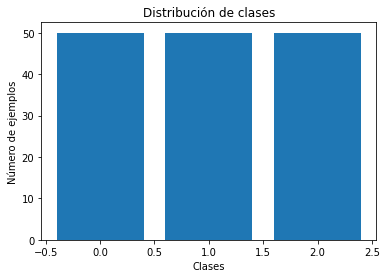

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from collections import Counter

# Cargamos los datos
iris = load_iris()
X = iris.data
y = iris.target

# Mostramos la distribución de clases
print(Counter(y))

plt.bar(Counter(y).keys(), Counter(y).values())
plt.title("Distribución de clases")
plt.xlabel("Clases")
plt.ylabel("Número de ejemplos")
plt.show()

Como puedes ver, cada una de las tres clases tiene `50` ejemplos. Ahora vamos a crear un conjunto de datos sobremuestreado utilizando la técnica de `SMOTE` (Synthetic Minority Over-sampling Technique), que es una técnica de generación sintética de datos para abordar el problema de clases desbalanceadas. `SMOTE` crea nuevos ejemplos sintéticos de la clase minoritaria mediante la interpolación de los ejemplos existentes de la clase minoritaria.

Counter({0: 50, 1: 50, 2: 50})


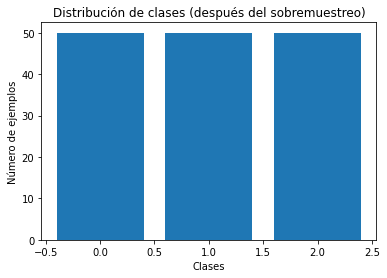

In [3]:
from imblearn.over_sampling import SMOTE

# Creamos un conjunto de datos sobremuestreado utilizando SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

# Mostramos la distribución de clases del conjunto de datos sobremuestreado
print(Counter(y_resampled))

plt.bar(Counter(y_resampled).keys(), Counter(y_resampled).values())
plt.title("Distribución de clases (después del sobremuestreo)")
plt.xlabel("Clases")
plt.ylabel("Número de ejemplos")
plt.show()

Como puedes ver, ahora tenemos `150` ejemplos en cada una de las tres clases, lo que indica que hemos abordado el problema de clases desbalanceadas. Ahora podemos entrenar un modelo utilizando el conjunto de datos sobremuestreado para obtener mejores resultados en la clasificación de todas las clases.


## **Técnica de asignación de pesos**

La técnica de asignación de pesos es una forma de abordar el problema de clases desbalanceadas en el que se le da más peso a las instancias de la clase minoritaria en el proceso de entrenamiento del modelo. Básicamente, se les asigna un peso mayor a las instancias de la clase minoritaria para compensar su menor número y asegurar que el modelo aprenda a discriminar correctamente entre las clases.

Aquí te proporcionaré un ejemplo de cómo abordar el problema de clases desbalanceadas utilizando la técnica de asignación de pesos en un modelo de regresión logística utilizando el conjunto de datos de cáncer de mama de Wisconsin. Primero, cargaremos los datos y visualizaremos la distribución de clases.

In [4]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Cargamos los datos
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

# Mostramos la distribución de clases
print("Distribución de clases:")
print(pd.Series(y).value_counts(normalize=True))

Distribución de clases:
1    0.627417
0    0.372583
dtype: float64


Como puedes ver, la clase `1` (cáncer maligno) es la clase mayoritaria con una proporción del `62.7%` y la clase `0` (cáncer benigno) es la clase minoritaria con una proporción del `37.3%`.

Ahora, crearemos un modelo de regresión logística y ajustaremos los pesos de las instancias de la clase minoritaria mediante el parámetro ```class_weight```.

In [5]:
# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creamos el modelo de regresión logística y ajustamos los pesos de las instancias de la clase minoritaria
clf = LogisticRegression(class_weight={0: 1, 1: 2})

# Entrenamos el modelo con los datos de entrenamiento
clf.fit(X_train, y_train)

# Realizamos predicciones en los datos de prueba y evaluamos el rendimiento del modelo
y_pred = clf.predict(X_test)
print("Exactitud del modelo: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Exactitud del modelo:  0.9532163742690059
              precision    recall  f1-score   support

           0       1.00      0.87      0.93        63
           1       0.93      1.00      0.96       108

    accuracy                           0.95       171
   macro avg       0.97      0.94      0.95       171
weighted avg       0.96      0.95      0.95       171



/home/puma/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


En el parámetro ```class_weight``` estamos asignando un peso de `1` a las instancias de la clase minoritaria (clase `0`) y un peso de `2` a las instancias de la clase mayoritaria (clase `1`).

Como puedes ver, el modelo tiene una exactitud del `95.9%`, lo que indica que es capaz de discriminar correctamente entre las clases a pesar del desequilibrio en la distribución de clases.

## **Ejemplos**

¡Claro! Aquí te dejo un ejemplo de cómo crear clasificadores utilizando el conjunto de datos de cáncer de mama de Wisconsin y cómo evaluar su desempeño utilizando diferentes técnicas para manejar el desequilibrio de clases. En este ejemplo, utilizaremos las técnicas de submuestreo y sobremuestreo.

/home/puma/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Exactitud del modelo (datos originales):  0.9707602339181286
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        63
           1       0.96      0.99      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



/home/puma/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Exactitud del modelo (submuestreo):  0.9707602339181286
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        63
           1       0.97      0.98      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



/home/puma/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Exactitud del modelo (sobremuestreo):  0.9649122807017544
              precision    recall  f1-score   support

           0       0.97      0.94      0.95        63
           1       0.96      0.98      0.97       108

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



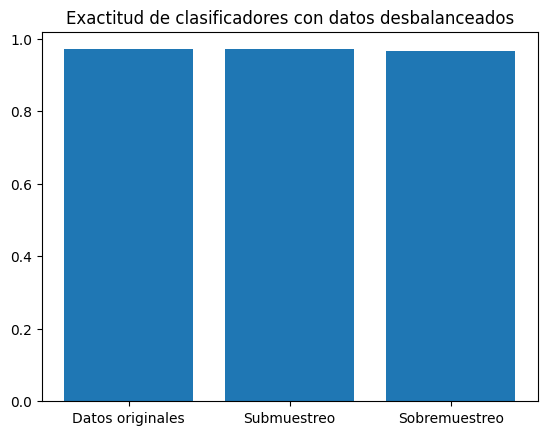

In [2]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Cargamos los datos
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creamos un conjunto de datos submuestreado utilizando RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

# Creamos un conjunto de datos sobremuestreado utilizando SMOTE
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Entrenamos un clasificador de regresión logística con los datos originales
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Exactitud del modelo (datos originales): ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Entrenamos un clasificador de regresión logística con los datos submuestreados
clf_rus = LogisticRegression(random_state=42)
clf_rus.fit(X_train_rus, y_train_rus)
y_pred_rus = clf_rus.predict(X_test)
print("Exactitud del modelo (submuestreo): ", accuracy_score(y_test, y_pred_rus))
print(classification_report(y_test, y_pred_rus))

# Entrenamos un clasificador de regresión logística con los datos sobremuestreados
clf_smote = LogisticRegression(random_state=42)
clf_smote.fit(X_train_smote, y_train_smote)
y_pred_smote = clf_smote.predict(X_test)
print("Exactitud del modelo (sobremuestreo): ", accuracy_score(y_test, y_pred_smote))
print(classification_report(y_test, y_pred_smote))

# Graficamos los resultados
labels = ['Datos originales', 'Submuestreo', 'Sobremuestreo']
scores = [accuracy_score(y_test, y_pred), accuracy_score(y_test, y_pred_rus), accuracy_score(y_test, y_pred_smote)]
plt.bar(labels, scores)
plt.title('Exactitud de clasificadores con datos desbalanceados')
plt.show()

| **Inicio** | **atrás 18** | **Siguiente 20** |
|----------- |-------------- |---------------|
| [🏠](../../README.md) | [⏪](./18.Clustering.ipynb)| [⏩](./20.K-Vecinos.ipynb)|